In [1]:
# La práctica deberá realizarse de manera individual y debe entregarse en la plataforma de Instituto BME.

# Para cada ejercicio: 1) Entregad un fichero en ipython notebook (.ipynb) ejecutable en Colab, y 
# 2) cada notebook ha de incluir un comentario sobre el ejercicio y sus resultados.

# 4) Utiliza el método de Q-learning usando una matriz para Q (no una función) para 
# resolver el entorno del Frozen Lake de OpenAI Gym (“FrozenLake-v1"). 
# Busca los valores de los 3 parámetros (discount_factor, alpha, y epsilon) 
# que minimizan el número de iteraciones en el entrenamiento (num_episodes) 
# necesarios para conseguir finalizar el juego satisfactoriamente el mayor número de veces.

In [2]:
# RLQlearn taxi
# RL_Qlearning_Taxi_clase.ipynb primero miro esto
# si no me va, puedo ver son RL_Deep_Qlearning_conv_Taxi_Keras_clase.ipynb

In [3]:
# 0 Install pygame and virtual display (needed in Colab)
!pip install pygame
!pip install pyvirtualdisplay
!apt install xvfb
from pyvirtualdisplay import Display
Display("xvfb").start()
import numpy as np
import matplotlib.pyplot as plt
import gym
from tqdm.notebook import tqdm, trange
# To build and display animations
from PIL import Image
from IPython import display

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  libfontenc1 libxfont2 libxkbfile1 x11-xkb-utils xfonts-base xfonts-encodings
  xfonts-utils xserver-common
The following NEW packages will be installed:
  libfontenc1 libxfont2 libxkbfile1 x11-xkb-utils xfonts-base xfonts-encodings
  xfonts-utils xserver-common xvfb
0 upgraded, 9 newly installed, 0 to remove and 24 not upgraded.
Need to get 7,697 kB of archives.
After this operation, 11.9 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/main amd64 libfontenc1 amd64 1:1.1.4-0ubuntu1 [14.0 kB]
Get:2 http://archive.ubuntu.com/ubuntu focal/main amd64 libxfont2 amd64 1:2.0.3-1 [91.7 kB]
Get:3 http://archive.ubu

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


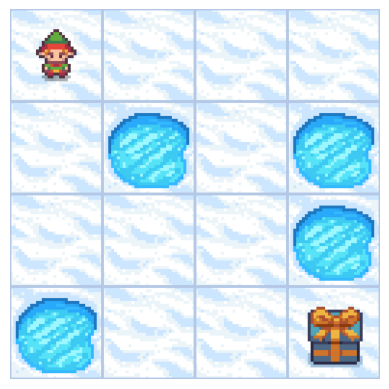

In [4]:
# 1 Cargar entorno
env = gym.make("FrozenLake-v1", render_mode="rgb_array", new_step_api=True) # ansi

env.reset()
plt.imshow(env.render()[0])
plt.axis('off');

Streaming output truncated to the last 5000 lines.
Episode 2100, reward 0.00
Episode 2200, reward 0.00
Episode 2300, reward 0.00
Episode 2400, reward 0.01
Episode 2500, reward 0.01
Episode 2600, reward 0.01
Episode 2700, reward 0.02
Episode 2800, reward 0.03
Episode 2900, reward 0.04
Episode 3000, reward 0.04
Episode 3100, reward 0.04
Episode 3200, reward 0.05
Score over time: 0.05024813895781638
Last reward: 1.0
0.5 0.96 0.1 0.05024813895781638 3225
Episode  100, reward 0.00
Episode  200, reward 0.00
Episode  300, reward 0.00
Episode  400, reward 0.00
Episode  500, reward 0.00
Episode  600, reward 0.00
Episode  700, reward 0.00
Episode  800, reward 0.00
Episode  900, reward 0.00
Episode 1000, reward 0.00
Episode 1100, reward 0.00
Episode 1200, reward 0.00
Episode 1300, reward 0.00
Episode 1400, reward 0.00
Episode 1500, reward 0.00
Episode 1600, reward 0.00
Episode 1700, reward 0.00
Episode 1800, reward 0.00
Episode 1900, reward 0.00
Episode 2000, reward 0.00
Episode 2100, reward 0.00

,learning_rate,gamma,eps,sum(rList)/num_episodes,episode+1
0,0.5,0.92,0.08,0.050016,12457.0
1,0.5,0.92,0.10,0.050004,24939.0
2,0.5,0.92,0.12,0.050059,3417.0
3,0.5,0.93,0.08,0.050019,26691.0
4,0.5,0.93,0.10,0.050048,13548.0
...,...,...,...,...,...
67,0.9,0.96,0.10,0.050057,7852.0
68,0.9,0.96,0.12,0.050018,11237.0
69,0.9,0.97,0.08,0.050260,1155.0
70,0.9,0.97,0.10,0.050242,2071.0


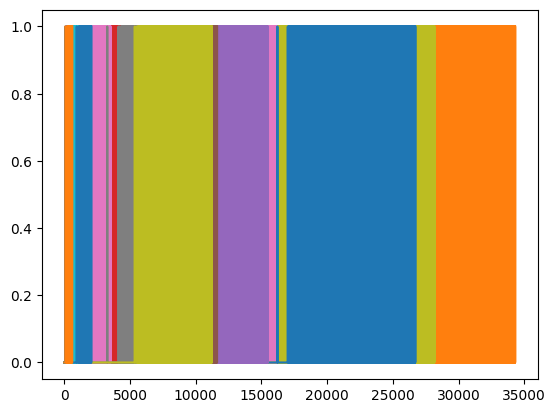

In [5]:
# 2 Establecer la matriz Q creando lr, gamma y eps en listas para que itere algo 
# hasta ver que el modelo entrena antes bien por lo menos 5 veces llegando al tesoro
# los valores de las listas de Q los tomo alredodor que los que tenemos por 
# referencia

# according https://gymnasium.farama.org/tutorials/training_agents/FrozenLake_tuto/
# tiene los mismos parametros de learning_rate=0.8, gamma=0.95, epsilon=0.1,
# que en el programa dado por Valero. Asi que hago las listas de valores
# lr, gamma y eps alrededor de estos valores.


# Initialize table with all zeros
# Q = np.zeros([env.observation_space.n, env.action_space.n])
# Set learning parameters
# nA = env.action_space.n

num_episodes = 20000 # el del taxi tenia 2000 # se necesita como 
# referencia para la primera vez que se hace el while

# create list to contain total rewards
rList = []


##### nuevo################ listas de los valores de la matriz Q para poder 
# Podria poner listas mas largas, pero tardaria demasiado
# ver varias combinaciones
# learning_rate = .8 # alpha: TD learning rate.
learning_rate_list = [0.5,0.65,0.8,0.9]
# gamma = .95 # discount_factor: Gamma discount factor.
gamma_list = [.92,.93,.94,.95,.96,.97]
# eps = 0.1 # epsilon: Chance the sample a random action. Float betwen 0 and 1.
eps_list = [.08,.1,.12]
# num_episodes: Number of episodes to run for.
# para conseguir finalizar el juego satisfactoriamente el mayor número de veces.

import pandas as pd
resultados = pd.DataFrame(columns=['learning_rate','gamma','eps',
                                   'sum(rList)/num_episodes','episode+1'])



# 3 Entreno con 3 fors el problema para que me de " la mejor" combinacion de 
# los parametros de la matriz Q.
# Fuerza Bruta...


# learning_rate_list = [0.8,0.9]
# gamma_list = [.95]
# eps_list = [.1,]

# for episode in range(num_episodes):
for learning_rate in learning_rate_list: 
    for gamma in gamma_list:
        for eps in eps_list:

############## nuevo ponerlo aqui para resetear la Q siempre a 
########### cero y no a un valor ya bueno de la iteración anterior

            # Initialize table with all zeros
            Q = np.zeros([env.observation_space.n, env.action_space.n])
            
            # Set learning parameters
            nA = env.action_space.n


#########################################################################
            # create list to contain total rewards
            rList = []
            episode = 0
            while sum(rList)/num_episodes < 0.05:
                episode += 1
                num_episodes = episode
            # nuevo:
            # entiendo que:
            # que minimizan el número de iteraciones en el entrenamiento  
            # (num_episodes) necesarios para conseguir finalizar el juego 
            # satisfactoriamente el mayor número de veces. Significa que 
            # rAll >0.0 y como parece que da 0.01 cada vez que llega al destino; 
            # entiendo que debo elegir como mayor numerio de veces por ejemplo  
            # 5 veces: Entonces que los bucles terminen cuandorAll > = 0.05. 
#####################################################################


                # Reset environment and get first new observation
                s = env.reset()
                rAll = 0
                # The Q-Table learning algorithm
                for _ in range(100):
                    # Choose an action by using epsilon greedy 
                    ai = np.argmax(Q[s,:])
                    p = np.ones((nA,))*eps/(nA-1)
                    p[ai] = 1-eps
                    a  = np.random.choice(np.arange(len(p)), p=p)
                    # Get new state and reward from environment
                    s1, reward, terminated, truncated, info = env.step(a)
                    # Update Q-Table with new knowledge
                    Q[s,a] = Q[s,a] + learning_rate * (reward + gamma * np.max(Q[s1,:]) - Q[s,a])
                    
                    rAll += reward
                    s = s1
                    if terminated or truncated:
                        break

                # break
                rList.append(rAll)

                if (episode+1) % 100 == 0: # lo he cambiado a 100 desde 10 
                # para ver si me es mas rapido pq necesiata menso tiempo para plotear
                    print("Episode %4d, reward %.2f" % (episode+1, 
                                                        sum(rList)/num_episodes))



            print("Score over time:", sum(rList)/num_episodes)
            print("Last reward:", rList[-1])

            plt.plot(rList)


            #nuevo: grabo en el resultados para luego ver que combinacion de lr, 
            # gamma y eps me da menso numero de sum(rList)/num_episodes 
            # y episode+1
            resultados.loc[len(resultados .index)] = [learning_rate,gamma,eps,
                                                      sum(rList)/num_episodes,
                                                      episode+1]
            print(learning_rate,gamma,eps,sum(rList)/num_episodes,episode+1)
resultados

In [7]:
resultados

,learning_rate,gamma,eps,sum(rList)/num_episodes,episode+1
0,0.5,0.92,0.08,0.050016,12457.0
1,0.5,0.92,0.10,0.050004,24939.0
2,0.5,0.92,0.12,0.050059,3417.0
3,0.5,0.93,0.08,0.050019,26691.0
4,0.5,0.93,0.10,0.050048,13548.0
...,...,...,...,...,...
67,0.9,0.96,0.10,0.050057,7852.0
68,0.9,0.96,0.12,0.050018,11237.0
69,0.9,0.97,0.08,0.050260,1155.0
70,0.9,0.97,0.10,0.050242,2071.0


In [13]:
# SI ordeno de forma ascendente el df resultados por la columna 'episode+1'
# entonces la fila 0 seria la que tendia los valores que pide el enunciado

resultados_ord = resultados.sort_values('episode+1',ascending=True)
print(f'La mejor combinación de valores de learning_rate,gamma,eps, son {resultados_ord.iloc[0,0]} ,{resultados_ord.iloc[0,1]} y {resultados_ord.iloc[0,2]} con un episode+1 de {resultados_ord.iloc[0,4]}.')
print(f'La segunda mejor combinación de learning_rate,gamma,eps, son {resultados_ord.iloc[1,0]} ,{resultados_ord.iloc[1,1]} y {resultados_ord.iloc[1,2]} con un episode+1 de {resultados_ord.iloc[1,4]}.')
print(f'La tercera mejor combinación de learning_rate,gamma,eps, son {resultados_ord.iloc[2,0]} ,{resultados_ord.iloc[2,1]} y {resultados_ord.iloc[2,2]} con un episode+1 de {resultados_ord.iloc[2,4]}.')
resultados_ord.iloc[:10,:]

La mejor combinación de valores de learning_rate,gamma,eps, son 0.9 ,0.97 y 0.12 con un episode+1 de 619.0.
La segunda mejor combinación de learning_rate,gamma,eps, son 0.5 ,0.95 y 0.1 con un episode+1 de 644.0.
La tercera mejor combinación de learning_rate,gamma,eps, son 0.8 ,0.96 y 0.12 con un episode+1 de 735.0.


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,learning_rate,gamma,eps,sum(rList)/num_episodes,episode+1
71,0.90,0.97,0.12,0.050162,619.0
10,0.50,0.95,0.10,0.051322,644.0
50,0.80,0.96,0.12,0.050409,735.0
44,0.80,0.94,0.12,0.050175,858.0
8,0.50,0.94,0.12,0.050562,891.0
15,0.50,0.97,0.08,0.050104,959.0
19,0.65,0.92,0.10,0.050046,1080.0
69,0.90,0.97,0.08,0.050260,1155.0
20,0.65,0.92,0.12,0.050209,1435.0
59,0.90,0.93,0.12,0.050091,1658.0


In [ ]:
# PARA EL EJERCICIO SIGIENTEO TOMO LA COMBINACION 
# learning_rate	gamma	eps
#  0.90	0.97	0.12	

In [ ]:
#  RESULTADO DE UNA ITERACION ANTERIOR

 # TARDE MUCHO TIEMPO
# Me ha echado el Colab por tenerlo mucho tiempo y estos son los valores que 
# Me salieron
0.5 0.92 0.08 0.050048433968356475 12389
0.5 0.92 0.1 0.05005829770695686 12866
0.5 0.92 0.12 0.05008403361344538 2976
0.5 0.93 0.08 0.050044682752457555 12310
0.5 0.93 0.1 0.05011303692539563 2655
0.5 0.93 0.12 0.050124275062137534 2415
0.5 0.94 0.08 0.050018602920658545 43005
0.5 0.94 0.1 0.05029880478087649 2009
0.5 0.94 0.12 0.05007066424389259 9907
0.5 0.95 0.08 0.050034586119437396 13012
0.5 0.95 0.1 0.05023696682464455 3166
0.5 0.95 0.12 0.050016507098052165 6059
0.5 0.96 0.08 0.05 4141
0.5 0.96 0.1 0.05006820187755757 12464
0.5 0.96 0.12 0.05 4641
0.5 0.97 0.08 0.05001940103707362 28350
0.5 0.97 0.1 0.05019420376456528 3348
0.5 0.97 0.12 0.05006906077348066 2897
0.65 0.92 0.08 0.050144927536231884 3451
0.65 0.92 0.1 0.05002146844139115 4659
0.65 0.92 0.12 0.05045871559633028 1091
0.65 0.93 0.08 0.050070854983467174 2118
0.65 0.93 0.1 0.05025868440502587 1354
0.65 0.93 0.12 0.05 3121
0.65 0.94 0.08 0.05012964563526361 5786
0.65 0.94 0.1 0.05002712313905129 16592
0.65 0.94 0.12 0.05008809463881198 3974
0.65 0.95 0.08 0.050505050505050504 1387
0.65 0.95 0.1 0.050566037735849056 1326
0.65 0.95 0.12 0.05003306149437955 4538
0.65 0.96 0.08 0.05012457863110069 6824
0.65 0.96 0.1 0.05013992537313433 4289
0.65 0.96 0.12 0.05001334400854016 18736
0.65 0.97 0.08 0.05012325390304026 6086
0.65 0.97 0.1 0.05004095004095004 12211
0.65 0.97 0.12 0.05002090009753379 7178
0.8 0.92 0.08 0.05 32881
0.8 0.92 0.1 0.05013850415512466 3611
0.8 0.92 0.12 0.0504983388704319 1506
0.8 0.93 0.08 0.050019091256204656 5239
0.8 0.93 0.1 0.05004766444232602 10491
0.8 0.93 0.12 0.05015170444404783 5604
0.8 0.94 0.08 0.050088045392291135 5112
0.8 0.94 0.1 0.0501453488372093 1377
0.8 0.94 0.12 0.050397877984084884 1509

# Que ordenados por episode+ son: 
0.65	0.92	0.12	0.05045871559633028	1091
0.65	0.95	0.1	0.050566037735849056	1326
0.65	0.93	0.1	0.05025868440502587	1354
0.8	0.94	0.1	0.0501453488372093	1377
0.65	0.95	0.08	0.050505050505050504	1387
0.8	0.92	0.12	0.0504983388704319	1506
0.8	0.94	0.12	0.050397877984084884	1509
0.5	0.94	0.1	0.05029880478087649	2009
0.65	0.93	0.08	0.050070854983467174	2118
0.5	0.93	0.12	0.050124275062137534	2415
0.5	0.93	0.1	0.05011303692539563	2655
0.5	0.97	0.12	0.05006906077348066	2897
0.5	0.92	0.12	0.05008403361344538	2976
0.65	0.93	0.12	0.05	3121
0.5	0.95	0.1	0.05023696682464455	3166
0.5	0.97	0.1	0.05019420376456528	3348
0.65	0.92	0.08	0.050144927536231884	3451
0.8	0.92	0.1	0.05013850415512466	3611
0.65	0.94	0.12	0.05008809463881198	3974
0.5	0.96	0.08	0.05	4141
0.65	0.96	0.1	0.05013992537313433	4289
0.65	0.95	0.12	0.05003306149437955	4538
0.5	0.96	0.12	0.05	4641
0.65	0.92	0.1	0.05002146844139115	4659
0.8	0.94	0.08	0.050088045392291135	5112
0.8	0.93	0.08	0.050019091256204656	5239
0.8	0.93	0.12	0.05015170444404783	5604
0.65	0.94	0.08	0.05012964563526361	5786
0.5	0.95	0.12	0.050016507098052165	6059
0.65	0.97	0.08	0.05012325390304026	6086
0.65	0.96	0.08	0.05012457863110069	6824
0.65	0.97	0.12	0.05002090009753379	7178
0.5	0.94	0.12	0.05007066424389259	9907
0.8	0.93	0.1	0.05004766444232602	10491
0.65	0.97	0.1	0.05004095004095004	12211
0.5	0.93	0.08	0.050044682752457555	12310
0.5	0.92	0.08	0.050048433968356475	12389
0.5	0.96	0.1	0.05006820187755757	12464
0.5	0.92	0.1	0.05005829770695686	12866
0.5	0.95	0.08	0.050034586119437396	13012
0.65	0.94	0.1	0.05002712313905129	16592
0.65	0.96	0.12	0.05001334400854016	18736
0.5	0.97	0.08	0.05001940103707362	28350
0.8	0.92	0.08	0.05	32881
0.5	0.94	0.08	0.050018602920658545	43005

# Entonces la "mejor" combinaciones de valores de Q son: 0.65	0.92	0.12